In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import dataframe_image as dfi

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
ps = pd.read_stata('/Users/virpa/Documents/UNIBO/LMEC_2°/Introduction to Python for Econometrics/Project/data.dta')
ps.head()

,mergeid,id,htype,nursinghome,otrf,single,fahc,fohc,hprf,thexp,...,esmoked,phinact,doctor,hospital,cjs,lifesat,year,hstatus,income,life_sat
0,IT-668183-01,73877.0,3,0,5.0,0,8400.0,1200.0,360.0,10430.000000,...,0.0,0.0,2,0,1.0,9,2015.0,2.0,0.300000,1.0
1,IT-705543-01,74127.0,3,0,1.0,0,9600.0,1200.0,0.0,11200.000000,...,0.0,0.0,4,0,5.0,7,2015.0,2.0,0.180000,0.0
2,IT-901302-01,75514.0,3,0,1.0,0,6000.0,0.0,0.0,6316.000000,...,1.0,0.0,1,0,2.0,7,2013.0,3.0,0.065068,0.0
3,IT-804108-01,74831.0,3,0,1.0,0,8400.0,3600.0,0.0,17698.353241,...,0.0,0.0,1,0,1.0,8,2015.0,3.0,0.360000,1.0
4,IT-672423-01,73896.0,3,0,1.0,0,6000.0,240.0,0.0,6440.000000,...,0.0,0.0,0,0,1.0,7,2015.0,2.0,0.186000,0.0


In [3]:
ps.columns

Index(['mergeid', 'id', 'htype', 'nursinghome', 'otrf', 'single', 'fahc',
       'fohc', 'hprf', 'thexp', 'hnetw', 'gender', 'age', 'yedu', 'mstat',
       'nchild', 'ngrchild', 'gali', 'bmi', 'esmoked', 'phinact', 'doctor',
       'hospital', 'cjs', 'lifesat', 'year', 'hstatus', 'income', 'life_sat'],
      dtype='object')

In [4]:
print('The dataset has dimension', ps.shape)

The dataset has dimension (12292, 29)


In [5]:
print('NaN for each variable:\n', ps.isna().sum(axis=0))
print('\n Total Nan', ps.isna().sum(axis=0).sum())

ps = ps.dropna(subset=['life_sat','income', 'year', 'age', 'gender', 'mstat', 'hstatus', 'gali', 'otrf', 'bmi', 'cjs'], how='any') 

NaN for each variable:
 mergeid         0
id              0
htype           0
nursinghome     0
otrf           48
single          0
fahc            0
fohc            0
hprf            0
thexp           0
hnetw           0
gender          0
age             0
yedu            0
mstat           0
nchild          0
ngrchild        0
gali            0
bmi             0
esmoked         2
phinact         2
doctor          0
hospital        0
cjs            48
lifesat         0
year            0
hstatus         0
income          0
life_sat        0
dtype: int64

 Total Nan 100


In [6]:
print('The dataset without null values has shape', ps.shape)

The dataset without null values has shape (12244, 29)


## Principal Component Analysis

In [7]:
from statsmodels.multivariate.pca import PCA
from pylab import *

In [8]:
print('Before applying some regressions, we can compute exploratory analysis to better understand the continuous variables.')

ps3 = ps.loc[:,['life_sat', 'fahc','hprf', 'thexp','hnetw','age','yedu', 'bmi','hstatus','income' ]] 

Before applying some regressions, we can compute exploratory analysis to better understand the continuous variables.


In [9]:
print('We define the dependent variable to predict, i.e. life satisfaction, and the independent continuous variables.')

xvar = ps3[['fahc','hprf', 'thexp','hnetw','age','yedu', 'bmi','income']]
yvar = ps3['life_sat']

We define the dependent variable to predict, i.e. life satisfaction, and the independent continuous variables.


The correlation matrix shows most of the values around zero for the majority of the variables.


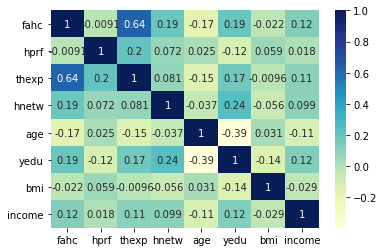

In [10]:
print('The correlation matrix shows most of the values around zero for the majority of the variables.')

xvarplot = sns.heatmap(xvar.corr(), cmap="YlGnBu", annot=True);
plt.show;

In [11]:
print('We apply the analysis to the correlation matrix since the variables have different magnitude.')

pca_mod = PCA(xvar, standardize=True, missing='fill-em')

We apply the analysis to the correlation matrix since the variables have different magnitude.


Following the scree plot we select three components.


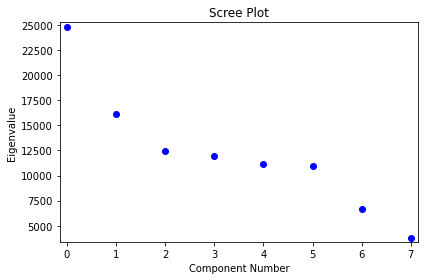

In [12]:
print('Following the scree plot we select three components.')

figsize=(15, 12)
fig = pca_mod.plot_scree(log_scale=False)
fig.savefig('scree_plot')

In [13]:
print('The loadings of the variables tell us theirs weight on the component.')

pca_mod.loadings.iloc[:,0:3]

The loadings of the variables tell us theirs weight on the component.


,comp_0,comp_1,comp_2
fahc,-0.534008,0.283135,0.211429
hprf,-0.058106,0.514289,-0.429427
thexp,-0.509411,0.434916,0.183523
hnetw,-0.280006,-0.086682,-0.681530
age,0.361821,0.349411,-0.304622
yedu,-0.419973,-0.471630,-0.002996
bmi,0.101380,0.326241,0.312363
income,-0.236614,-0.087860,-0.286971


In [14]:
print('The scores for the first six observations:')

pca_mod.scores.iloc[:6,0:3]

The scores for the first six observations:


,comp_0,comp_1,comp_2
0,-0.003308,0.005790,0.008398
1,-0.009056,0.004020,0.004141
2,0.000816,-0.005275,0.004236
3,-0.017940,-0.002030,0.008179
4,0.007005,0.005312,0.003467
5,0.001875,0.012370,-0.009376


In [15]:
print('We create two datasets to contain the scores and the loadings.')

ncomp = 3
comp_scores = pca_mod.scores.iloc[:,0:ncomp]
comp_loadings = pca_mod.loadings.iloc[:,0:ncomp]

We create two datasets to contain the scores and the loadings.


We plot the loadings of the first two components


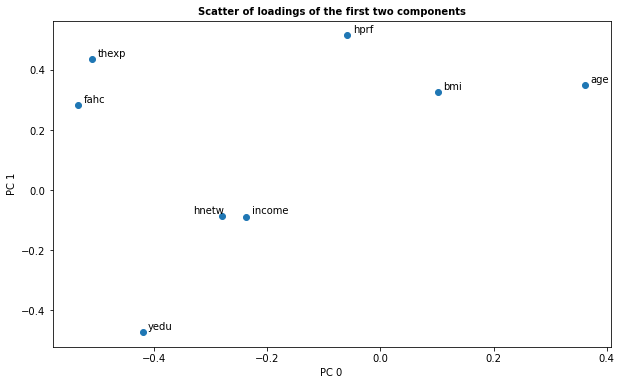

In [16]:
print('We plot the loadings of the first two components')

plt.figure(figsize=(10, 6))
plt.scatter(comp_loadings['comp_0'], comp_loadings['comp_1']);
plt.title('Scatter of loadings of the first two components',fontsize=10, fontweight='bold');
plt.xlabel("PC 0");
plt.ylabel("PC 1");
plt.text(x=(comp_loadings['comp_0'][0]+0.01), y=(comp_loadings['comp_1'][0]+0.01), s='fahc'); 
plt.text(x=(comp_loadings['comp_0'][1]+0.01), y=(comp_loadings['comp_1'][1]+0.01), s='hprf');
plt.text(x=(comp_loadings['comp_0'][2]+0.01), y=(comp_loadings['comp_1'][2]+0.01), s='thexp');
plt.text(x=(comp_loadings['comp_0'][3]-0.05), y=(comp_loadings['comp_1'][3]+0.01), s='hnetw');
plt.text(x=(comp_loadings['comp_0'][4]+0.01), y=(comp_loadings['comp_1'][4]+0.01), s='age');
plt.text(x=(comp_loadings['comp_0'][5]+0.01), y=(comp_loadings['comp_1'][5]+0.01), s='yedu');
plt.text(x=(comp_loadings['comp_0'][6]+0.01), y=(comp_loadings['comp_1'][6]+0.01), s='bmi');
plt.text(x=(comp_loadings['comp_0'][7]+0.01), y=(comp_loadings['comp_1'][7]+0.01), s='income');

We plot the loadings of the second and third component


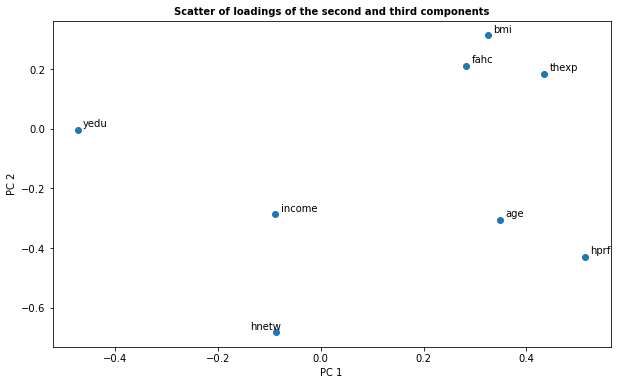

In [17]:
print('We plot the loadings of the second and third component')

plt.figure(figsize=(10, 6))
plt.scatter(comp_loadings['comp_1'], comp_loadings['comp_2']);
plt.title('Scatter of loadings of the second and third components',fontsize=10, fontweight='bold');
plt.xlabel("PC 1");
plt.ylabel("PC 2");
plt.text(x=(comp_loadings['comp_1'][0]+0.01), y=(comp_loadings['comp_2'][0]+0.01), s='fahc');
plt.text(x=(comp_loadings['comp_1'][1]+0.01), y=(comp_loadings['comp_2'][1]+0.01), s='hprf');
plt.text(x=(comp_loadings['comp_1'][2]+0.01), y=(comp_loadings['comp_2'][2]+0.01), s='thexp');
plt.text(x=(comp_loadings['comp_1'][3]-0.05), y=(comp_loadings['comp_2'][3]+0.01), s='hnetw');
plt.text(x=(comp_loadings['comp_1'][4]+0.01), y=(comp_loadings['comp_2'][4]+0.01), s='age');
plt.text(x=(comp_loadings['comp_1'][5]+0.01), y=(comp_loadings['comp_2'][5]+0.01), s='yedu');
plt.text(x=(comp_loadings['comp_1'][6]+0.01), y=(comp_loadings['comp_2'][6]+0.01), s='bmi');
plt.text(x=(comp_loadings['comp_1'][7]+0.01), y=(comp_loadings['comp_2'][7]+0.01), s='income');

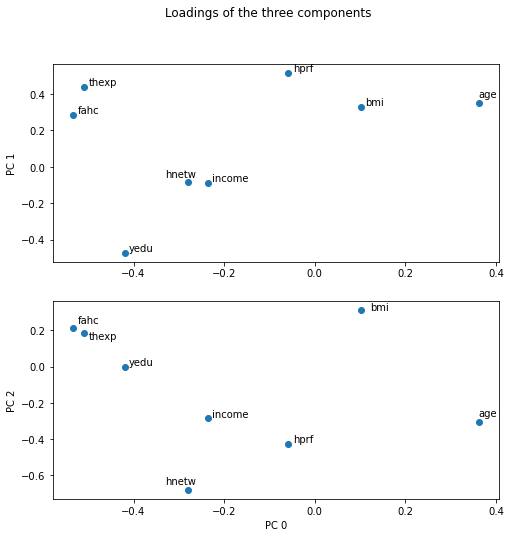

In [18]:
fig, axs = plt.subplots(2, figsize=(8, 8)) 
fig.suptitle('Loadings of the three components')
axs[0].scatter(comp_loadings['comp_0'], comp_loadings['comp_1']);
axs[0].set_ylabel('PC 1')
axs[0].text(x=(comp_loadings['comp_0'][0]+0.01), y=(comp_loadings['comp_1'][0]+0.01), s='fahc');
axs[0].text(x=(comp_loadings['comp_0'][1]+0.01), y=(comp_loadings['comp_1'][1]+0.01), s='hprf');
axs[0].text(x=(comp_loadings['comp_0'][2]+0.01), y=(comp_loadings['comp_1'][2]+0.01), s='thexp');
axs[0].text(x=(comp_loadings['comp_0'][3]-0.05), y=(comp_loadings['comp_1'][3]+0.03), s='hnetw');
axs[0].text(x=(comp_loadings['comp_0'][4]), y=(comp_loadings['comp_1'][4]+0.03), s='age');
axs[0].text(x=(comp_loadings['comp_0'][5]+0.01), y=(comp_loadings['comp_1'][5]+0.01), s='yedu');
axs[0].text(x=(comp_loadings['comp_0'][6]+0.01), y=(comp_loadings['comp_1'][6]+0.01), s='bmi');
axs[0].text(x=(comp_loadings['comp_0'][7]+0.01), y=(comp_loadings['comp_1'][7]+0.01), s='income');

axs[1].scatter(comp_loadings['comp_0'], comp_loadings['comp_2']);
axs[1].set_xlabel('PC 0');
axs[1].set_ylabel('PC 2');
axs[1].text(x=(comp_loadings['comp_0'][0]+0.01), y=(comp_loadings['comp_2'][0]+0.03), s='fahc');
axs[1].text(x=(comp_loadings['comp_0'][1]+0.01), y=(comp_loadings['comp_2'][1]+0.01), s='hprf');
axs[1].text(x=(comp_loadings['comp_0'][2]+0.01), y=(comp_loadings['comp_2'][2]-0.03), s='thexp');
axs[1].text(x=(comp_loadings['comp_0'][3]-0.05), y=(comp_loadings['comp_2'][3]+0.03), s='hnetw');
axs[1].text(x=(comp_loadings['comp_0'][4]), y=(comp_loadings['comp_2'][4]+0.03), s='age');
axs[1].text(x=(comp_loadings['comp_0'][5]+0.01), y=(comp_loadings['comp_2'][5]+0.01), s='yedu');
axs[1].text(x=(comp_loadings['comp_0'][6]+0.02), y=(comp_loadings['comp_2'][6]), s='bmi');
axs[1].text(x=(comp_loadings['comp_0'][7]+0.01), y=(comp_loadings['comp_2'][7]+0.01), s='income');

fig.savefig('loadings')

We plot the scores for the first two components


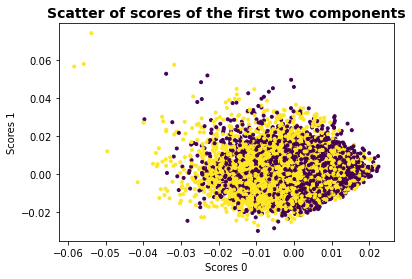

In [19]:
print('We plot the scores for the first two components')

plt.scatter(comp_scores['comp_0'],comp_scores['comp_1'], marker='.', c=yvar);
plt.title('Scatter of scores of the first two components',fontsize=14, fontweight='bold');
plt.xlabel("Scores 0");
plt.ylabel("Scores 1");

We plot the scores for the second and third component


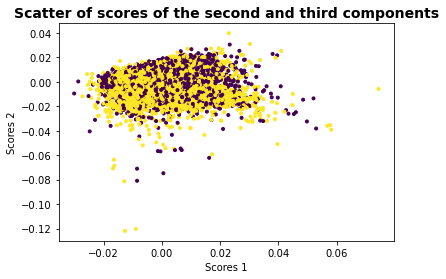

In [20]:
print('We plot the scores for the second and third component')

plt.scatter(comp_scores['comp_1'],comp_scores['comp_2'], marker='.', c=yvar);
plt.title('Scatter of scores of the second and third components',fontsize=14, fontweight='bold');
plt.xlabel("Scores 1");
plt.ylabel("Scores 2");

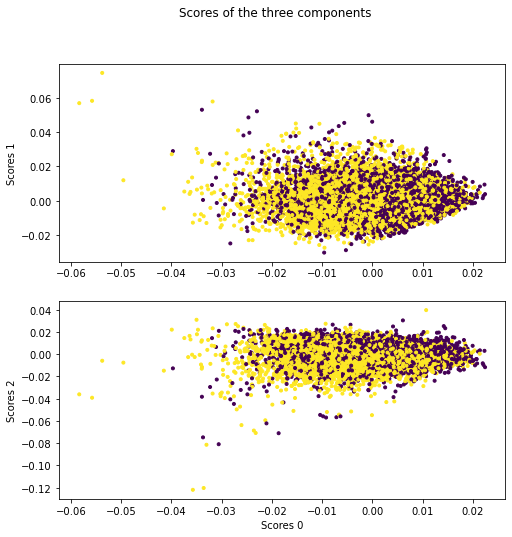

In [21]:
fig2, axs2 = plt.subplots(2, figsize=(8, 8)) 
fig2.suptitle('Scores of the three components')
axs2[0].scatter(comp_scores['comp_0'],comp_scores['comp_1'],marker='.', c=yvar);
axs2[0].set_ylabel('Scores 1')

axs2[1].scatter(comp_scores['comp_0'], comp_scores['comp_2'], marker='.', c=yvar);
axs2[1].set_xlabel('Scores 0');
axs2[1].set_ylabel('Scores 2');

fig2.savefig('scores')

##  Discriminant Analysis

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [23]:
print('Since the dependent variables have very different magnitude, we standardise them before applying the analysis')

scaler = preprocessing.StandardScaler().fit(xvar)
xvar_scaled = scaler.transform(xvar)

Since the dependent variables have very different magnitude, we standardise them before applying the analysis


In [24]:
print('We now apply the Linear Discriminant Analysis with one component')

lda = LinearDiscriminantAnalysis(n_components=1)
xvar_lda = lda.fit(xvar_scaled, yvar).transform(xvar_scaled) 

We now apply the Linear Discriminant Analysis with one component


We can consider also the boxplot to understand how well the component discriminates:


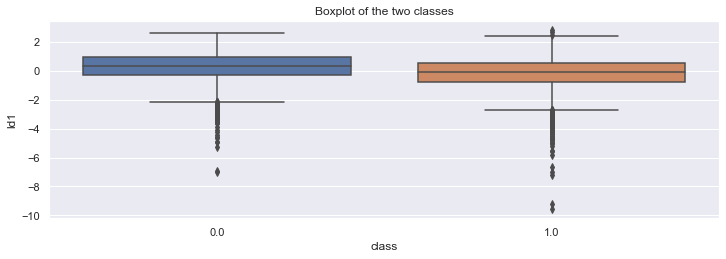

In [25]:
print('We can consider also the boxplot to understand how well the component discriminates:')

df_lda = pd.DataFrame(zip(xvar_lda[:,0],yvar),columns=["ld1","class"])
sns.set(rc={'figure.figsize':(12,8)}) 
plt.subplot(2,1,1)
sns.boxplot(x='class', y='ld1', data=df_lda).set(title='Boxplot of the two classes'); 
plt.savefig('box')

In [26]:
print('To evaluate our method, we apply the cross-validation criterion')

x_train, x_test, y_train, y_test = train_test_split(xvar_scaled, yvar , test_size = 0.3, random_state = 0)

To evaluate our method, we apply the cross-validation criterion


In [27]:
print('We obtain the two set predicted with the Discriminant Analysis')

x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

We obtain the two set predicted with the Discriminant Analysis


In [28]:
print('To classify our sets, we apply the Logistic Classification')

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

To classify our sets, we apply the Logistic Classification


LogisticRegression(random_state=0)

In [29]:
print('The model fits our set and predict the values')

y_pred = classifier.predict(x_test)

The model fits our set and predict the values


In [30]:
non_sat = y_pred[y_pred == 0]
sat = y_pred[y_pred == 1]

print('In our sample we predicted that', len(sat), 'people are satisfied, whereas', len(non_sat), 'people are not.')

In our sample we predicted that 2774 people are satisfied, whereas 900 people are not.


In [31]:
print('Finally, we can compute the confusion matrix:')

cm = confusion_matrix(y_test, y_pred)
print(cm)

Finally, we can compute the confusion matrix:
[[ 518  991]
 [ 382 1783]]


In [32]:
accuracy = round(accuracy_score(y_test,y_pred)*100)
misrate = round((1-accuracy_score(y_test,y_pred))*100)

print ('The accuracy is', accuracy,'%, whereas the misclassification rate is', misrate,'%.')

The accuracy is 63 %, whereas the misclassification rate is 37 %.


## Dataset cleaning

In [33]:
print('We select our main variables for the regression analysis:')

ps2 = ps.loc[:, ['life_sat','income','year', 'age', 'gender', 'yedu', 'mstat', 'hstatus', 'gali', 'otrf', 'bmi', 'cjs']]
ps2.head()

We select our main variables for the regression analysis:


,life_sat,income,year,age,gender,yedu,mstat,hstatus,gali,otrf,bmi,cjs
0,1.0,0.300000,2015.0,74,1,11.0,5,2.0,1,5.0,28.405338,1.0
1,0.0,0.180000,2015.0,62,2,8.0,1,2.0,0,1.0,27.548209,5.0
2,0.0,0.065068,2013.0,60,1,8.0,1,3.0,0,1.0,23.629490,2.0
3,1.0,0.360000,2015.0,65,1,20.0,1,3.0,0,1.0,25.102391,1.0
4,0.0,0.186000,2015.0,77,1,5.0,1,2.0,1,1.0,29.384757,1.0


In [34]:
print('We turn the year into a datetime object.')

ps2['year'] = pd.to_datetime(ps2['year'], errors='coerce',  format="%Y")
ps2['year'] = ps2['year'].dt.year

We turn the year into a datetime object.


In [35]:
print('We drop some incorrect values of the variable cjs and we create a dummy for the gender.')

ps2 = ps2[ps2.cjs<6] 

gend = pd.get_dummies(ps2['gender'])
ps2['male'] = gend[1]
ps2.drop('gender', axis = 1, inplace=True)
ps2.head()

We drop some incorrect values of the variable cjs and we create a dummy for the gender.


,life_sat,income,year,age,yedu,mstat,hstatus,gali,otrf,bmi,cjs,male
0,1.0,0.300000,2015,74,11.0,5,2.0,1,5.0,28.405338,1.0,1
1,0.0,0.180000,2015,62,8.0,1,2.0,0,1.0,27.548209,5.0,0
2,0.0,0.065068,2013,60,8.0,1,3.0,0,1.0,23.629490,2.0,1
3,1.0,0.360000,2015,65,20.0,1,3.0,0,1.0,25.102391,1.0,1
4,0.0,0.186000,2015,77,5.0,1,2.0,1,1.0,29.384757,1.0,1


In [36]:
print('The new dimension of the dataset is', ps2.shape)

The new dimension of the dataset is (11993, 12)


## Descriptive statistic

### Life satisfaction

In [37]:
print('Descriptive table for life satisfaction:')

ps2.groupby('year').life_sat.describe()

Descriptive table for life satisfaction:


,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,3189.0,0.600815,0.489813,0.0,0.0,1.0,1.0,1.0
2013,4209.0,0.559991,0.496448,0.0,0.0,1.0,1.0,1.0
2015,4595.0,0.593906,0.491159,0.0,0.0,1.0,1.0,1.0


The distribution of life satisfaction:


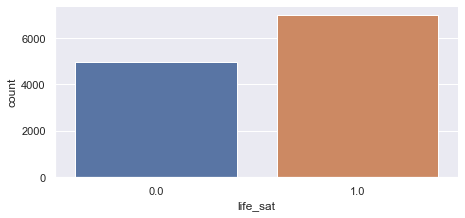

In [38]:
print('The distribution of life satisfaction:')

fig1 = sns.catplot(data=ps2, x="life_sat", kind="count", height=3, aspect=15/7);
fig1.savefig('life_sat')

In [39]:
count_zero = len(ps2[ps2.life_sat==0])
count_one = len(ps2[ps2.life_sat==1])
pct_zero = round((count_zero/(count_zero+count_one))*100,2)
pct_one = round((count_one/(count_zero+count_one))*100, 2)

print('The dataset contains the', pct_zero, '% of people not satisifed and the', pct_one, '% of people satisfied.')

The dataset contains the 41.62 % of people not satisifed and the 58.38 % of people satisfied.


### Income

In [40]:
print('Descriptive table for the income:')

ps2.groupby('year').income.describe().round(2)

Descriptive table for the income:


,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,3189.0,0.35,0.47,0.05,0.14,0.20,0.34,3.36
2013,4209.0,0.39,0.59,0.04,0.14,0.20,0.34,4.20
2015,4595.0,0.22,0.11,0.06,0.13,0.19,0.29,0.60


The distribution of income:


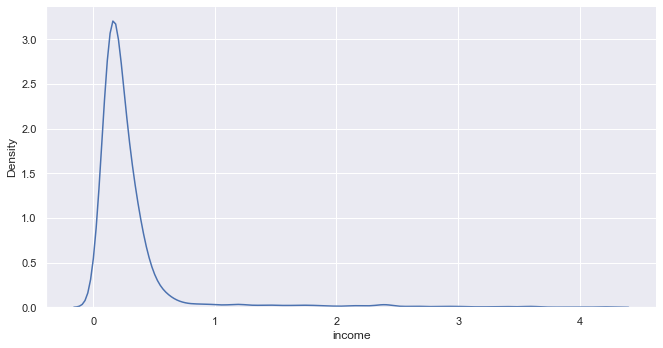

In [41]:
print('The distribution of income:')

fig2 = sns.displot(ps2, x="income", kind='kde', height=5, aspect=15/8);
fig2.savefig('income')

### Years of education

In [42]:
print('Descriptive table of years of education:')

ps2.groupby('year').yedu.describe().round(2)

Descriptive table of years of education:


,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,3189.0,8.25,4.29,0.0,5.0,8.0,12.0,25.0
2013,4209.0,8.78,4.55,0.0,5.0,8.0,13.0,25.0
2015,4595.0,9.05,4.58,0.0,5.0,8.0,13.0,25.0


The distribution of years of education:


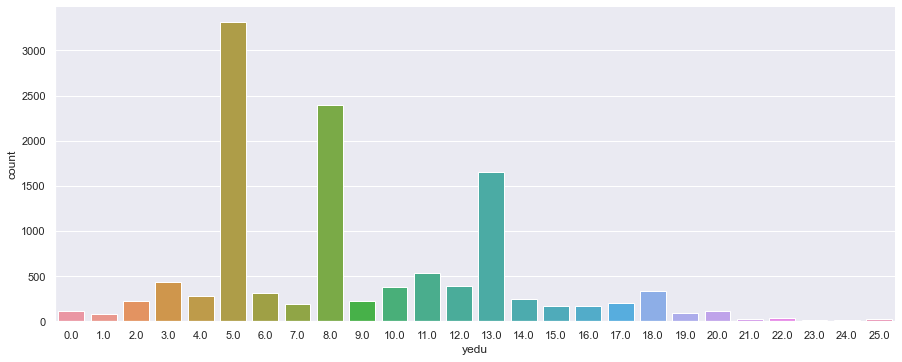

In [43]:
print('The distribution of years of education:')

fig3 = sns.catplot(data=ps2, x="yedu", kind="count", height=5, aspect=20/8);
fig3.savefig('yedu')

### Health status perception

In [44]:
print('Descriptive table of health status:')

ps2.groupby('year').hstatus.describe().round(2)

Descriptive table of health status:


,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,3189.0,2.77,1.07,1.0,2.0,3.0,3.0,5.0
2013,4209.0,2.72,1.08,1.0,2.0,3.0,3.0,5.0
2015,4595.0,2.79,1.03,1.0,2.0,3.0,3.0,5.0


The distribution of health status:


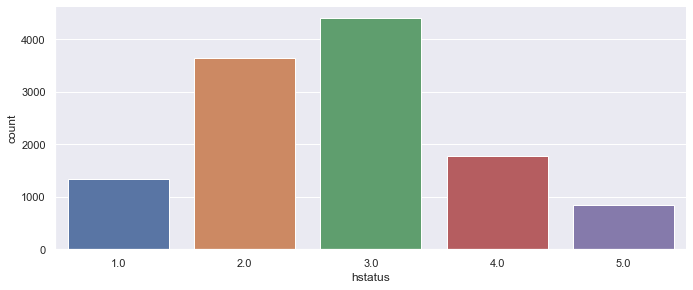

In [45]:
print('The distribution of health status:')

fig4 = sns.catplot(data=ps2, x="hstatus", kind="count", height=4, aspect=12/5);
fig4.savefig('hstatus')

### Housing condition

In [46]:
print('Descriptive table of housing condition:')

ps2.groupby('year').otrf.describe().round(2)

Descriptive table of housing condition:


,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,3189.0,1.49,1.13,1.0,1.0,1.0,1.0,5.0
2013,4209.0,1.43,1.08,1.0,1.0,1.0,1.0,5.0
2015,4595.0,1.43,1.08,1.0,1.0,1.0,1.0,5.0


The distribution of housing condition:


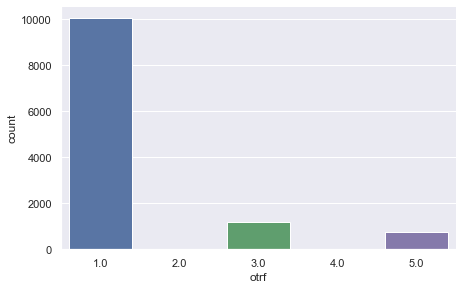

In [47]:
print('The distribution of housing condition:')

fig5 = sns.catplot(data=ps2, x="otrf", kind="count", height=4, aspect=8/5);
fig5.savefig('otrf')

In [48]:
freq_otrf = round(((ps2.otrf.value_counts())/ps2.otrf.count())*100,2 )

print('The table with relative frequences of housing condition is:\n')
print(freq_otrf)

The table with relative frequences of housing condition is:

1.0    83.80
3.0     9.80
5.0     6.25
2.0     0.13
4.0     0.03
Name: otrf, dtype: float64


### Body Mass Index

In [49]:
print('Descriptive table for Body Mass Index:')

ps2.groupby('year').bmi.describe().round(2)

Descriptive table for Body Mass Index:


,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,3189.0,26.48,4.33,15.62,23.66,26.12,28.73,72.50
2013,4209.0,26.20,4.23,15.52,23.44,25.64,28.34,66.60
2015,4595.0,26.23,4.15,14.34,23.44,25.71,28.40,50.71


The distribution of the Body Mass Index:


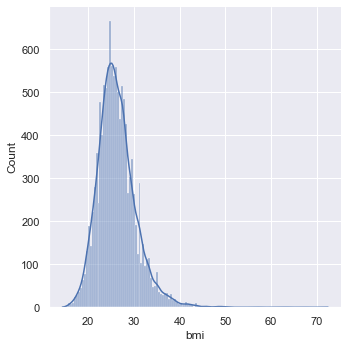

In [50]:
print('The distribution of the Body Mass Index:')

fig6 = sns.displot(ps2, x="bmi", kde=True);
fig6.savefig('bmi')

### Current job situation

In [51]:
print('Descriptive table for current job situation:')

ps2.groupby('year').cjs.describe().round(2)

Descriptive table for current job situation:


,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,3189.0,2.19,1.61,1.0,1.0,1.0,3.0,5.0
2013,4209.0,2.14,1.55,1.0,1.0,1.0,2.0,5.0
2015,4595.0,2.15,1.54,1.0,1.0,1.0,3.0,5.0


The distribution of current job situation:


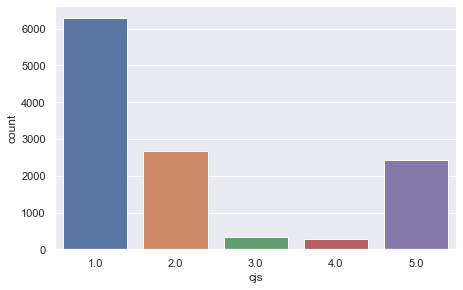

In [52]:
print('The distribution of current job situation:')

fig7 = sns.catplot(data=ps2, x="cjs", kind="count", height=4, aspect=8/5);
fig7.savefig('cjs')

In [53]:
freq_cjs = round(((ps2.cjs.value_counts())/ps2.cjs.count())*100 ,2)

print('The table with relative frequences of current job situation is:\n')
print(freq_cjs)

The table with relative frequences of current job situation is:

1.0    52.40
2.0    22.26
5.0    20.21
3.0     2.82
4.0     2.31
Name: cjs, dtype: float64


## OLS Regression

In [54]:
xols_reg = np.array([ps2.age, ps2.male, ps2.yedu, ps2.mstat, ps2.hstatus, ps2.gali, ps2.otrf, ps2.bmi, ps2.cjs])
model_OLS = smf.ols('life_sat ~ income + xols_reg.T + C(year)', data=ps2).fit()
model_OLS.summary()
#print(model_OLS.summary().as_latex())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               life_sat   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     119.7
Date:                Thu, 10 Nov 2022   Prob (F-statistic):          1.97e-283
Time:                        15:23:59   Log-Likelihood:                -7854.2
No. Observations:               11993   AIC:                         1.573e+04
Df Residuals:                   11980   BIC:                         1.583e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2260      0.056      4.052      0.000       0.117       0.335
C(year)[T.2013]    -0.0396      0.011     -3.613      0.000      -0.061      -0.018
C(year)[T.2015]    -0.0122      0.011     -1.126      0.260      -0.034       0.009
income              0.0331      0.010      3.302      0.001       0.013       0.053
xols_reg.T[0]       0.0038      0.001      7.209      0.000       0.003       0.005
xols_reg.T[1]      -0.0196      0.010     -2.006      0.045      -0.039      -0.000
xols_reg.T[2]       0.0053      0.001      4.880      0.000       0.003       0.007
xols_reg.T[3]      -0.0338      0.003    -13.182      0.000      -0.039      -0.029
xols_reg.T[4]       0.1031      0.005     20.715      0.000       0.093       0.113
xols_reg.T[5]      -0.0726      0.011     -6.829      0.000      -0.093      -0.052
xols_reg.T[6]      -0.0228      0.004     -5.764      0.000      -0.031      -0.015
xols_reg.T[7]      -0.0017      0.001     -1.621      0.105      -0.004       0.000
xols_reg.T[8]      -0.0173      0.003     -5.478      0.000      -0.024      -0.011
==============================================================================
Omnibus:                    77993.927   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1269.367
Skew:                          -0.298   Prob(JB):                    2.29e-276
Kurtosis:                       1.522   Cond. No.                         960.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
print('We create a DataFrame with the coefficients, t-values and p-values.')

res = pd.DataFrame(data=[model_OLS.params, model_OLS.tvalues, model_OLS.pvalues]).T
res = res.rename(columns = {0: 'Coeff', 1:'t', 2:'p-value'})

We create a DataFrame with the coefficients, t-values and p-values.


In [56]:
res.Coeff = res.Coeff.map(lambda p: round(p, 3))
res.t = res.t.map(lambda p: round(p, 3))
res['p-value'] = res['p-value'].map(lambda p: round(p,3))

In [57]:
res
#print(res.to_latex())  

,Coeff,t,p-value
Intercept,0.226,4.052,0.000
C(year)[T.2013],-0.040,-3.613,0.000
C(year)[T.2015],-0.012,-1.126,0.260
income,0.033,3.302,0.001
xols_reg.T[0],0.004,7.209,0.000
xols_reg.T[1],-0.020,-2.006,0.045
xols_reg.T[2],0.005,4.880,0.000
xols_reg.T[3],-0.034,-13.182,0.000
xols_reg.T[4],0.103,20.715,0.000
xols_reg.T[5],-0.073,-6.829,0.000


In [58]:
print('We compute another OLS regression with categorical variable outside the control vector')

xols_reg2 = np.array([ps2.age, ps2.male, ps2.yedu, ps2.hstatus, ps2.gali, ps2.bmi])
model2_OLS = smf.ols('life_sat ~ income + xols_reg2.T + C(mstat) + C(otrf) + C(cjs) + C(year)', data=ps2).fit()
model2_OLS.summary()
#print(model2_OLS.summary().as_latex())

We compute another OLS regression with categorical variable outside the control vector


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               life_sat   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     70.32
Date:                Thu, 10 Nov 2022   Prob (F-statistic):          7.50e-295
Time:                        15:24:51   Log-Likelihood:                -7804.5
No. Observations:               11993   AIC:                         1.566e+04
Df Residuals:                   11970   BIC:                         1.583e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2246      0.060      3.773      0.000       0.108       0.341
C(mstat)[T.2]      -0.0536      0.036     -1.498      0.134      -0.124       0.017
C(mstat)[T.3]      -0.1357      0.051     -2.655      0.008      -0.236      -0.036
C(mstat)[T.4]      -0.1665      0.019     -8.672      0.000      -0.204      -0.129
C(mstat)[T.5]      -0.1655      0.027     -6.160      0.000      -0.218      -0.113
C(mstat)[T.6]      -0.1373      0.014     -9.472      0.000      -0.166      -0.109
C(otrf)[T.2.0]     -0.1733      0.120     -1.443      0.149      -0.409       0.062
C(otrf)[T.3.0]     -0.0952      0.015     -6.483      0.000      -0.124      -0.066
C(otrf)[T.4.0]     -0.5126      0.268     -1.910      0.056      -1.039       0.014
C(otrf)[T.5.0]     -0.0379      0.018     -2.126      0.034      -0.073      -0.003
C(cjs)[T.2.0]      -0.0041      0.014     -0.297      0.767      -0.031       0.023
C(cjs)[T.3.0]      -0.1943      0.027     -7.065      0.000      -0.248      -0.140
C(cjs)[T.4.0]      -0.1026      0.029     -3.485      0.000      -0.160      -0.045
C(cjs)[T.5.0]      -0.0590      0.013     -4.526      0.000      -0.084      -0.033
C(year)[T.2013]    -0.0366      0.011     -3.344      0.001      -0.058      -0.015
C(year)[T.2015]    -0.0086      0.011     -0.790      0.429      -0.030       0.013
income              0.0274      0.010      2.740      0.006       0.008       0.047
xols_reg2.T[0]      0.0028      0.001      4.457      0.000       0.002       0.004
xols_reg2.T[1]     -0.0063      0.010     -0.637      0.524      -0.026       0.013
xols_reg2.T[2]      0.0050      0.001      4.541      0.000       0.003       0.007
xols_reg2.T[3]      0.1005      0.005     20.146      0.000       0.091       0.110
xols_reg2.T[4]     -0.0692      0.011     -6.498      0.000      -0.090      -0.048
xols_reg2.T[5]     -0.0017      0.001     -1.621      0.105      -0.004       0.000
==============================================================================
Omnibus:                    85456.725   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1234.242
Skew:                          -0.300   Prob(JB):                    9.72e-269
Kurtosis:                       1.548   Cond. No.                     4.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
print('We create the DataFrame with the coefficients, t-values and p-values')

res2 = pd.DataFrame(data=[model2_OLS.params, model2_OLS.tvalues, model2_OLS.pvalues]).T
res2 = res2.rename(columns = {0: 'Coeff', 1:'t', 2:'p-value'})

We create the DataFrame with the coefficients, t-values and p-values


In [60]:
res2.Coeff = res2.Coeff.map(lambda p: round(p, 3))
res2.t = res2.t.map(lambda p: round(p, 3))
res2['p-value'] = res2['p-value'].map(lambda p: round(p,3))

In [61]:
res2
#print(res2.to_latex()) 

,Coeff,t,p-value
Intercept,0.225,3.773,0.000
C(mstat)[T.2],-0.054,-1.498,0.134
C(mstat)[T.3],-0.136,-2.655,0.008
C(mstat)[T.4],-0.166,-8.672,0.000
C(mstat)[T.5],-0.165,-6.160,0.000
C(mstat)[T.6],-0.137,-9.472,0.000
C(otrf)[T.2.0],-0.173,-1.443,0.149
C(otrf)[T.3.0],-0.095,-6.483,0.000
C(otrf)[T.4.0],-0.513,-1.910,0.056
C(otrf)[T.5.0],-0.038,-2.126,0.034


In [62]:
m1 = model2_OLS.fittedvalues>1
m0 = model2_OLS.fittedvalues<0
out_r = sum(m0) + sum(m1)
pct_out_r = round(((sum(m0) + sum(m1))/len(model2_OLS.fittedvalues))*100, 4)

print('There are', out_r, 'values outside the admissible range [0,1] which is the', pct_out_r, '% of the total.')
print('Now we assume a threshold of 0.5 and classify our fitted values in the two classes.')

There are 9 values outside the admissible range [0,1] which is the 0.075 % of the total.
Now we assume a threshold of 0.5 and classify our fitted values in the two classes.


In [63]:
fittval_ols = pd.Series(model2_OLS.fittedvalues)
result = pd.concat([ps2.life_sat, fittval_ols], axis=1)
result = result.rename(columns = {0:'fit_values'})

print('We gather the true values of life satisfaction and the ones predicted from the ols regression.')
print('The overall matrix has numerosity of', len(result))

We gather the true values of life satisfaction and the ones predicted from the ols regression.
The overall matrix has numerosity of 11993


In [64]:
result = result.drop(result[result.fit_values < 0].index)
result = result.drop(result[result.fit_values > 1].index)

print('We drop the units that have a fitted value outside the admissible range')
print('The new matrix numerosity is', len(result) )

We drop the units that have a fitted value outside the admissible range
The new matrix numerosity is 11984


In [65]:
print('We classify the fitted values according to the default treshold.')

treshold = 0.5
fitdum = []

for i in result.fit_values:
    if i>treshold:
        i=1
        fitdum.append(i)
    else:
        i=0
        fitdum.append(i)

We classify the fitted values according to the default treshold.


In [66]:
print('The final matrix includes observed data, fitted values and their classification:')

fitdum = pd.DataFrame(fitdum)
fitdum = fitdum.set_index(result.index)
result2 = pd.concat([result, fitdum], axis=1)
result2 = result2.rename(columns={0:'classif'})
result2.head()

The final matrix includes observed data, fitted values and their classification:


,life_sat,fit_values,classif
0,1.0,0.358154,0
1,0.0,0.528109,1
2,0.0,0.646946,1
3,1.0,0.758309,1
4,0.0,0.535108,1


In [67]:
cross = pd.crosstab(result2.life_sat, result2.classif)
cross.dfi.export('cross_ols.png')

print('Finally, we compute a bivariate table to identify the amount of corrected predicted units')
cross

Finally, we compute a bivariate table to identify the amount of corrected predicted units


classif,0,1
life_sat,,
0.0,2245,2738
1.0,1304,5697


In [68]:
tot_ols = cross.sum()[0]+cross.sum()[1]
pct_corr_ols = round(((cross[0][0]+cross[1][1])/tot_ols)*100,2) 
pct_wrong_ols = round(((cross[0][1]+cross[1][0])/tot_ols)*100,2)

print('The ols predicts the', pct_corr_ols, '% correctly and the', pct_wrong_ols, '% wrong.')

The ols predicts the 66.27 % correctly and the 33.73 % wrong.


In [69]:
pred_zero_ols = round((cross.sum()[0]/tot_ols)*100,2)
pred_one_ols = round((cross.sum()[1]/tot_ols)*100,2)

print('The ols predict the', pred_zero_ols, '% of people not satisifed and the', pred_one_ols, '% of people satisfied.')
print('However, our dataset included', pct_zero, '% of people not satisfied and', pct_one, '% satisfied.')

The ols predict the 29.61 % of people not satisifed and the 70.39 % of people satisfied.
However, our dataset included 41.62 % of people not satisfied and 58.38 % satisfied.


## Probit Regression

In [70]:
xpr_reg = np.array([ps2.age, ps2.male, ps2.yedu, ps2.hstatus, ps2.gali, ps2.bmi])
model_probit = smf.probit('life_sat ~ income + xpr_reg.T + C(mstat) + C(otrf) + C(cjs) + C(year)', data=ps2).fit()
model_probit.summary()
#print(model_probit.summary().as_latex())

         Current function value: 0.619059
         Iterations: 35


C:\Anaconda37\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:               life_sat   No. Observations:                11993
Model:                         Probit   Df Residuals:                    11970
Method:                           MLE   Df Model:                           22
Date:                Thu, 10 Nov 2022   Pseudo R-squ.:                 0.08831
Time:                        15:27:55   Log-Likelihood:                -7424.4
converged:                      False   LL-Null:                       -8143.5
Covariance Type:            nonrobust   LLR p-value:                4.972e-291
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8141      0.168     -4.836      0.000      -1.144      -0.484
C(mstat)[T.2]      -0.1572      0.100     -1.569      0.117      -0.354       0.039
C(mstat)[T.3]      -0.3769      0.145     -2.603      0.009      -0.661      -0.093
C(mstat)[T.4]      -0.4577      0.054     -8.507      0.000      -0.563      -0.352
C(mstat)[T.5]      -0.4543      0.075     -6.081      0.000      -0.601      -0.308
C(mstat)[T.6]      -0.3688      0.040     -9.123      0.000      -0.448      -0.290
C(otrf)[T.2.0]     -0.5001      0.342     -1.461      0.144      -1.171       0.171
C(otrf)[T.3.0]     -0.2629      0.041     -6.401      0.000      -0.343      -0.182
C(otrf)[T.4.0]     -6.7854   7198.490     -0.001      0.999   -1.41e+04    1.41e+04
C(otrf)[T.5.0]     -0.1065      0.050     -2.141      0.032      -0.204      -0.009
C(cjs)[T.2.0]      -0.0064      0.040     -0.161      0.872      -0.084       0.071
C(cjs)[T.3.0]      -0.5345      0.078     -6.886      0.000      -0.687      -0.382
C(cjs)[T.4.0]      -0.2788      0.085     -3.280      0.001      -0.445      -0.112
C(cjs)[T.5.0]      -0.1614      0.037     -4.420      0.000      -0.233      -0.090
C(year)[T.2013]    -0.1034      0.031     -3.342      0.001      -0.164      -0.043
C(year)[T.2015]    -0.0265      0.031     -0.862      0.389      -0.087       0.034
income              0.0769      0.029      2.675      0.007       0.021       0.133
xpr_reg.T[0]        0.0079      0.002      4.538      0.000       0.005       0.011
xpr_reg.T[1]       -0.0198      0.028     -0.705      0.481      -0.075       0.035
xpr_reg.T[2]        0.0140      0.003      4.498      0.000       0.008       0.020
xpr_reg.T[3]        0.2868      0.014     19.800      0.000       0.258       0.315
xpr_reg.T[4]       -0.1767      0.030     -5.984      0.000      -0.235      -0.119
xpr_reg.T[5]       -0.0047      0.003     -1.640      0.101      -0.010       0.001
===================================================================================
"""

In [71]:
print('We extract coefficients, t-values and p-values')

res_prob = pd.DataFrame(data=[model_probit.params, model_probit.tvalues, model_probit.pvalues]).T
res_prob = res_prob.rename(columns = {0: 'Coeff', 1:'t', 2:'p-value'})

We extract coefficients, t-values and p-values


In [72]:
res_prob.Coeff = res_prob.Coeff.map(lambda p: round(p, 3))
res_prob.t = res_prob.t.map(lambda p: round(p, 3))
res_prob['p-value'] = res_prob['p-value'].map(lambda p: round(p,3))

In [ ]:
res_prob
#print(res_prob.to_latex())  

In [73]:
print('The average marginal effect of the variables:')

model_probit.get_margeff(at='overall', method='dydx').summary()

The average marginal effect of the variables:


<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:               life_sat
Method:                          dydx
At:                           overall
===================================================================================
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
C(mstat)[T.2]      -0.0555      0.035     -1.569      0.117      -0.125       0.014
C(mstat)[T.3]      -0.1331      0.051     -2.605      0.009      -0.233      -0.033
C(mstat)[T.4]      -0.1617      0.019     -8.583      0.000      -0.199      -0.125
C(mstat)[T.5]      -0.1604      0.026     -6.108      0.000      -0.212      -0.109
C(mstat)[T.6]      -0.1303      0.014     -9.217      0.000      -0.158      -0.103
C(otrf)[T.2.0]     -0.1766      0.121     -1.461      0.144      -0.414       0.060
C(otrf)[T.3.0]     -0.0928      0.014     -6.434      0.000      -0.121      -0.065
C(otrf)[T.4.0]     -2.3964   2542.284     -0.001      0.999   -4985.182    4980.389
C(otrf)[T.5.0]     -0.0376      0.018     -2.143      0.032      -0.072      -0.003
C(cjs)[T.2.0]      -0.0022      0.014     -0.161      0.872      -0.030       0.025
C(cjs)[T.3.0]      -0.1888      0.027     -6.926      0.000      -0.242      -0.135
C(cjs)[T.4.0]      -0.0985      0.030     -3.284      0.001      -0.157      -0.040
C(cjs)[T.5.0]      -0.0570      0.013     -4.431      0.000      -0.082      -0.032
C(year)[T.2013]    -0.0365      0.011     -3.347      0.001      -0.058      -0.015
C(year)[T.2015]    -0.0094      0.011     -0.862      0.389      -0.031       0.012
income              0.0271      0.010      2.677      0.007       0.007       0.047
xpr_reg.T[0]        0.0028      0.001      4.549      0.000       0.002       0.004
xpr_reg.T[1]       -0.0070      0.010     -0.705      0.481      -0.026       0.012
xpr_reg.T[2]        0.0050      0.001      4.509      0.000       0.003       0.007
xpr_reg.T[3]        0.1013      0.005     20.790      0.000       0.092       0.111
xpr_reg.T[4]       -0.0624      0.010     -6.012      0.000      -0.083      -0.042
xpr_reg.T[5]       -0.0017      0.001     -1.641      0.101      -0.004       0.000
===================================================================================
"""

In [74]:
class1 = model_probit.pred_table()

print('The classification table:')
print('\n',class1)

The classification table:

 [[2278. 2713.]
 [1309. 5693.]]


In [75]:
prob_well = round(((class1[0,0]+class1[1,1])/class1.sum())*100,2)
prob_bad = round(((class1[0,1]+class1[1,0])/class1.sum())*100, 2)

print('The percentage of well predicted is', prob_well, '% whereas the wrong predictions are the', prob_bad, '%.')

The percentage of well predicted is 66.46 % whereas the wrong predictions are the 33.54 %.


In [76]:
pred_zero_prob0 = round(((class1[0][0] + class1[1][0])/class1.sum())*100,2)
pred_one_prob0 = round(((class1[0][1] + class1[1][1])/class1.sum())*100,2)

print('The probit predicts the', pred_zero_prob0, '% of people not satisfied and the', pred_one_prob0, '% of people satisfied.')

The probit predicts the 29.91 % of people not satisfied and the 70.09 % of people satisfied.


In [77]:
print('We now add the interaction between income and time trend.')

We now add the interaction between income and time trend.


In [78]:
model_probit2 = smf.probit('life_sat ~ income + xpr_reg.T + C(mstat) + C(otrf) + C(cjs) + C(year) + income*C(year)', data=ps2).fit()
model_probit2.summary()
#print(model_probit.summary().as_latex())

         Current function value: 0.618051
         Iterations: 35


C:\Anaconda37\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:               life_sat   No. Observations:                11993
Model:                         Probit   Df Residuals:                    11968
Method:                           MLE   Df Model:                           24
Date:                Thu, 10 Nov 2022   Pseudo R-squ.:                 0.08979
Time:                        15:28:53   Log-Likelihood:                -7412.3
converged:                      False   LL-Null:                       -8143.5
Covariance Type:            nonrobust   LLR p-value:                2.196e-294
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.8178      0.169     -4.837      0.000      -1.149      -0.486
C(mstat)[T.2]             -0.1485      0.100     -1.480      0.139      -0.345       0.048
C(mstat)[T.3]             -0.3497      0.145     -2.409      0.016      -0.634      -0.065
C(mstat)[T.4]             -0.4344      0.054     -8.040      0.000      -0.540      -0.329
C(mstat)[T.5]             -0.4312      0.075     -5.751      0.000      -0.578      -0.284
C(mstat)[T.6]             -0.3525      0.041     -8.687      0.000      -0.432      -0.273
C(otrf)[T.2.0]            -0.4472      0.342     -1.306      0.192      -1.118       0.224
C(otrf)[T.3.0]            -0.2569      0.041     -6.247      0.000      -0.338      -0.176
C(otrf)[T.4.0]            -6.4721   2460.455     -0.003      0.998   -4828.875    4815.930
C(otrf)[T.5.0]            -0.1030      0.050     -2.071      0.038      -0.201      -0.006
C(cjs)[T.2.0]             -0.0159      0.040     -0.399      0.690      -0.094       0.062
C(cjs)[T.3.0]             -0.5092      0.078     -6.546      0.000      -0.662      -0.357
C(cjs)[T.4.0]             -0.2649      0.085     -3.119      0.002      -0.431      -0.098
C(cjs)[T.5.0]             -0.1450      0.037     -3.955      0.000      -0.217      -0.073
C(year)[T.2013]           -0.1023      0.038     -2.719      0.007      -0.176      -0.029
C(year)[T.2015]           -0.2331      0.054     -4.330      0.000      -0.339      -0.128
income                     0.0591      0.050      1.192      0.233      -0.038       0.156
income:C(year)[T.2013]     0.0035      0.060      0.058      0.954      -0.115       0.122
income:C(year)[T.2015]     0.9490      0.198      4.797      0.000       0.561       1.337
xpr_reg.T[0]               0.0081      0.002      4.610      0.000       0.005       0.012
xpr_reg.T[1]              -0.0143      0.028     -0.509      0.611      -0.070       0.041
xpr_reg.T[2]               0.0113      0.003      3.565      0.000       0.005       0.018
xpr_reg.T[3]               0.2866      0.014     19.777      0.000       0.258       0.315
xpr_reg.T[4]              -0.1759      0.030     -5.949      0.000      -0.234      -0.118
xpr_reg.T[5]              -0.0042      0.003     -1.460      0.144      -0.010       0.001
==========================================================================================
"""

In [79]:
print('We extract coefficients, t-values and p-values')

res_prob2 = pd.DataFrame(data=[model_probit2.params, model_probit2.tvalues, model_probit2.pvalues]).T
res_prob2 = res_prob2.rename(columns = {0: 'Coeff', 1:'t', 2:'p-value'})

We extract coefficients, t-values and p-values


In [80]:
res_prob2.Coeff = res_prob2.Coeff.map(lambda p: round(p, 3))
res_prob2.t = res_prob2.t.map(lambda p: round(p, 3))
res_prob2['p-value'] = res_prob2['p-value'].map(lambda p: round(p,3))

In [81]:
res_prob2
#print(res_prob2.to_latex())  

,Coeff,t,p-value
Intercept,-0.818,-4.837,0.000
C(mstat)[T.2],-0.148,-1.480,0.139
C(mstat)[T.3],-0.350,-2.409,0.016
C(mstat)[T.4],-0.434,-8.040,0.000
C(mstat)[T.5],-0.431,-5.751,0.000
C(mstat)[T.6],-0.352,-8.687,0.000
C(otrf)[T.2.0],-0.447,-1.306,0.192
C(otrf)[T.3.0],-0.257,-6.247,0.000
C(otrf)[T.4.0],-6.472,-0.003,0.998
C(otrf)[T.5.0],-0.103,-2.071,0.038


In [82]:
t1 = (np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,0,0,0,0,0,0]]), [0])

print(model_probit2.f_test(t1), '\n')
print('Given the test, we do not reject the null hypothesis that the estimates of income are equal between 2011 and 2013')

<F test: F=array([[0.28069495]]), p=0.5962559090859109, df_denom=1.2e+04, df_num=1> 

Given the test, we do not reject the null hypothesis that the estimates of income are equal between 2011 and 2013


In [83]:
t2 = (np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1,0,0,0,0,0,0]]), [0])

print(model_probit2.f_test(t2), '\n')
print('Given the test, we reject the null hypothesis that the estimates of income are equal between 2011 and 2015')

<F test: F=array([[17.2043468]]), p=3.379851725480527e-05, df_denom=1.2e+04, df_num=1> 

Given the test, we reject the null hypothesis that the estimates of income are equal between 2011 and 2015


In [84]:
t3 = (np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,0,0,0,0,0]]), [0])

print(model_probit2.f_test(t3), '\n')
print('Given the test, we reject the null hypothesis that the estimates of income are equal between 2013 and 2015')

<F test: F=array([[23.57342707]]), p=1.2175640448325868e-06, df_denom=1.2e+04, df_num=1> 

Given the test, we reject the null hypothesis that the estimates of income are equal between 2013 and 2015


In [85]:
print('The average marginal effects of the variables are:')

model_probit2.get_margeff(at='overall', method='dydx').summary()

The average marginal effects of the variables are:


<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:               life_sat
Method:                          dydx
At:                           overall
==========================================================================================
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(mstat)[T.2]             -0.0523      0.035     -1.480      0.139      -0.122       0.017
C(mstat)[T.3]             -0.1233      0.051     -2.411      0.016      -0.224      -0.023
C(mstat)[T.4]             -0.1532      0.019     -8.105      0.000      -0.190      -0.116
C(mstat)[T.5]             -0.1520      0.026     -5.774      0.000      -0.204      -0.100
C(mstat)[T.6]             -0.1243      0.014     -8.769      0.000      -0.152      -0.096
C(otrf)[T.2.0]            -0.1577      0.121     -1.306      0.191      -0.394       0.079
C(otrf)[T.3.0]            -0.0906      0.014     -6.277      0.000      -0.119      -0.062
C(otrf)[T.4.0]            -2.2819    867.495     -0.003      0.998   -1702.541    1697.978
C(otrf)[T.5.0]            -0.0363      0.018     -2.072      0.038      -0.071      -0.002
C(cjs)[T.2.0]             -0.0056      0.014     -0.399      0.690      -0.033       0.022
C(cjs)[T.3.0]             -0.1795      0.027     -6.581      0.000      -0.233      -0.126
C(cjs)[T.4.0]             -0.0934      0.030     -3.123      0.002      -0.152      -0.035
C(cjs)[T.5.0]             -0.0511      0.013     -3.963      0.000      -0.076      -0.026
C(year)[T.2013]           -0.0361      0.013     -2.721      0.007      -0.062      -0.010
C(year)[T.2015]           -0.0822      0.019     -4.339      0.000      -0.119      -0.045
income                     0.0208      0.017      1.193      0.233      -0.013       0.055
income:C(year)[T.2013]     0.0012      0.021      0.058      0.954      -0.041       0.043
income:C(year)[T.2015]     0.3346      0.070      4.809      0.000       0.198       0.471
xpr_reg.T[0]               0.0028      0.001      4.621      0.000       0.002       0.004
xpr_reg.T[1]              -0.0051      0.010     -0.509      0.611      -0.025       0.014
xpr_reg.T[2]               0.0040      0.001      3.570      0.000       0.002       0.006
xpr_reg.T[3]               0.1010      0.005     20.766      0.000       0.092       0.111
xpr_reg.T[4]              -0.0620      0.010     -5.976      0.000      -0.082      -0.042
xpr_reg.T[5]              -0.0015      0.001     -1.460      0.144      -0.003       0.001
==========================================================================================
"""

In [86]:
class2 = model_probit2.pred_table()

print('The classification table:')
print('\n',class2)

The classification table:

 [[2305. 2686.]
 [1348. 5654.]]


In [87]:
prob_well2 = round(((class2[0,0]+class2[1,1])/class2.sum())*100,2)
prob_bad2 = round(((class2[0,1]+class2[1,0])/class2.sum())*100, 2)

print('The percentage of well predicted is', prob_well2, '% whereas the wrong predictions are the', prob_bad2, '%.')

The percentage of well predicted is 66.36 % whereas the wrong predictions are the 33.64 %.


In [88]:
pred_zero_prob = round(((class2[0][0] + class2[1][0])/class2.sum())*100,2)
pred_one_prob = round(((class2[0][1] + class2[1][1])/class2.sum())*100,2)

print('The probit with the interaction between income and years predicts the', pred_zero_prob, '% of people not satisifed \nand the', pred_one_prob , '% of people satisfied.')
print('\nHowever, our dataset included', pct_zero, '% of people not satisfied and', pct_one, '% satisfied.')

The probit with the interaction between income and years predicts the 30.46 % of people not satisifed 
and the 69.54 % of people satisfied.

However, our dataset included 41.62 % of people not satisfied and 58.38 % satisfied.
